New set of weights found, iteration: 0 loss: 1.1008568 acc: 0.3333333333333333
New set of weights found, iteration: 1 loss: 1.0990819 acc: 0.3333333333333333
New set of weights found, iteration: 3 loss: 1.098629 acc: 0.3333333333333333
New set of weights found, iteration: 11 loss: 1.0985013 acc: 0.3333333333333333
New set of weights found, iteration: 58 loss: 1.0984759 acc: 0.36666666666666664
New set of weights found, iteration: 87 loss: 1.0984341 acc: 0.3933333333333333
New set of weights found, iteration: 389 loss: 1.0983855 acc: 0.3333333333333333
New set of weights found, iteration: 602 loss: 1.0983611 acc: 0.3433333333333333
New set of weights found, iteration: 812 loss: 1.0983337 acc: 0.3333333333333333
New set of weights found, iteration: 1765 loss: 1.0982677 acc: 0.37
New set of weights found, iteration: 3766 loss: 1.0980942 acc: 0.3333333333333333
New set of weights found, iteration: 3979 loss: 1.0980837 acc: 0.3333333333333333
New set of weights found, iteration: 5582 loss: 

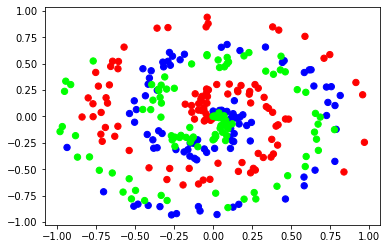

In [53]:
import numpy as np
import nnfs
from nnfs.datasets import vertical_data
import matplotlib.pyplot as plt

nnfs.init()

class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases


class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)


class Activation_Softmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True) # Normalization

        self.output = probabilities


class Loss:
    def calculate(self, output, y):
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        return data_loss


class Loss_CategoricalCrossentropy(Loss):
    def forward(self, y_pred, y_true):
        samples = len(y_pred)
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        correct_confidences = 0

        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(samples), y_true]
        elif len(y_true.shape) == 1:
            correct_confidences = np.sum(y_pred_clipped * y_true, axis=1)
        negative_log_likelihoods = - np.log(correct_confidences)
        return negative_log_likelihoods


# Dataset
# X, y = vertical_data(samples=100, classes=3)
X, y = spiral_data(samples=100, classes=3)

# Model
dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()

# Loss function
loss_function = Loss_CategoricalCrossentropy()

# Helper variables
lowest_loss = 999999
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()


for iteration in range(10000):
    
    # Generate a new set of weights for iteration
    dense1.weights = 0.05 * np.random.randn(2, 3)
    dense1.biases = 0.05 * np.random.randn(1, 3)
    dense2.weights = 0.05 * np.random.randn(3, 3)
    dense2.biases = 0.05 * np.random.randn(1, 3)
    
    # Perform a forward pass of the traning data through this layer
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)
    
    # Perform a forward pass through activation function
    # it takes the output of second dense layer here and returns loss
    loss = loss_function.calculate(activation2.output, y)
    
    # Calculate accuracy from output of activation2 and targets
    # calculate values along first axis
    predictions = np.argmax(activation2.output, axis=1)
    accuracy = np.mean(predictions == y)
    
    # If loss is smaller - print and save weights and biases aside
    if loss < lowest_loss:
        print('New set of weights found, iteration:', iteration,
        'loss:', loss, 'acc:', accuracy)
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        lowest_loss = loss
    


plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='brg')
plt.show()


New set of weights found, iteration: 0 loss: 1.0996814 acc: 0.3333333333333333
New set of weights found, iteration: 1 loss: 1.0992019 acc: 0.3333333333333333
New set of weights found, iteration: 8 loss: 1.0991263 acc: 0.33666666666666667
New set of weights found, iteration: 9 loss: 1.098923 acc: 0.3333333333333333


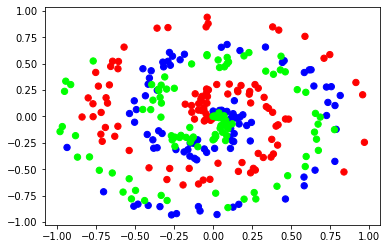

In [54]:
# Helper variables
lowest_loss = 999999
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()


for iteration in range(10000):

    # Update weights with some small random values
    dense1.weights += 0.05 * np.random.randn(2, 3)
    dense1.biases += 0.05 * np.random.randn(1, 3)
    dense2.weights += 0.05 * np.random.randn(3, 3)
    dense2.biases += 0.05 * np.random.randn(1, 3)
    
    # Perform a forward pass of the traning data through this layer
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)
    
    # Perform a forward pass through activation function
    # it takes the output of second dense layer here and returns loss
    loss = loss_function.calculate(activation2.output, y)
    
    # Calculate accuracy from output of activation2 and targets
    # calculate values along first axis
    predictions = np.argmax(activation2.output, axis=1)
    accuracy = np.mean(predictions == y)
    
    # If loss is smaller - print and save weights and biases aside
    if loss < lowest_loss:
        print('New set of weights found, iteration:', iteration,
        'loss:', loss, 'acc:', accuracy)
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        lowest_loss = loss
    


plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='brg')
plt.show()